In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import linear_model,datasets,tree
import matplotlib.pyplot as plt
%matplotlib inline

[[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]
 [ 5.4  3.9]
 [ 4.6  3.4]
 [ 5.   3.4]
 [ 4.4  2.9]
 [ 4.9  3.1]
 [ 5.4  3.7]
 [ 4.8  3.4]
 [ 4.8  3. ]
 [ 4.3  3. ]
 [ 5.8  4. ]
 [ 5.7  4.4]
 [ 5.4  3.9]
 [ 5.1  3.5]
 [ 5.7  3.8]
 [ 5.1  3.8]
 [ 5.4  3.4]
 [ 5.1  3.7]
 [ 4.6  3.6]
 [ 5.1  3.3]
 [ 4.8  3.4]
 [ 5.   3. ]
 [ 5.   3.4]
 [ 5.2  3.5]
 [ 5.2  3.4]
 [ 4.7  3.2]
 [ 4.8  3.1]
 [ 5.4  3.4]
 [ 5.2  4.1]
 [ 5.5  4.2]
 [ 4.9  3.1]
 [ 5.   3.2]
 [ 5.5  3.5]
 [ 4.9  3.1]
 [ 4.4  3. ]
 [ 5.1  3.4]
 [ 5.   3.5]
 [ 4.5  2.3]
 [ 4.4  3.2]
 [ 5.   3.5]
 [ 5.1  3.8]
 [ 4.8  3. ]
 [ 5.1  3.8]
 [ 4.6  3.2]
 [ 5.3  3.7]
 [ 5.   3.3]
 [ 7.   3.2]
 [ 6.4  3.2]
 [ 6.9  3.1]
 [ 5.5  2.3]
 [ 6.5  2.8]
 [ 5.7  2.8]
 [ 6.3  3.3]
 [ 4.9  2.4]
 [ 6.6  2.9]
 [ 5.2  2.7]
 [ 5.   2. ]
 [ 5.9  3. ]
 [ 6.   2.2]
 [ 6.1  2.9]
 [ 5.6  2.9]
 [ 6.7  3.1]
 [ 5.6  3. ]
 [ 5.8  2.7]
 [ 6.2  2.2]
 [ 5.6  2.5]
 [ 5.9  3.2]
 [ 6.1  2.8]
 [ 6.3  2.5]
 [ 6.1  2.8]
 [ 6.4  2.9]
 [ 6.6  3. ]
 [ 6.8  2.8]

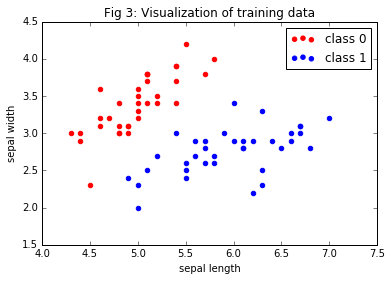

In [2]:
iris=datasets.load_iris()
X=iris.data[:,:2]
#X=print(x)
Y=iris.target
#print(Y)
X=X[:100]
Y=Y[:100]
print(X)
print(Y)
number_of_samples=len(Y)
random_indices=np.random.permutation(number_of_samples)
num_training_samples=int(number_of_samples*0.7)
X_train=X[random_indices[:(num_training_samples)]]
Y_train=Y[random_indices[:num_training_samples]]
num_validation_samples = int(number_of_samples*0.15)
X_val = X[random_indices[num_training_samples : num_training_samples+num_validation_samples]]
Y_val = Y[random_indices[num_training_samples: num_training_samples+num_validation_samples]]
#Test set
num_test_samples = int(number_of_samples*0.15)
X_test = X[random_indices[-num_test_samples:]]
Y_test = Y[random_indices[-num_test_samples:]]
X_class0 = np.asmatrix([X_train[i] for i in range(len(X_train)) if Y_train[i]==0]) #Picking only the first two classes
Y_class0 = np.zeros((X_class0.shape[0]),dtype=np.int)
X_class1 = np.asmatrix([X_train[i] for i in range(len(X_train)) if Y_train[i]==1])
Y_class1 = np.ones((X_class1.shape[0]),dtype=np.int)

plt.scatter(X_class0[:,0], X_class0[:,1],color='red')
plt.scatter(X_class1[:,0], X_class1[:,1],color='blue')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1'])
plt.title('Fig 3: Visualization of training data')
plt.show()


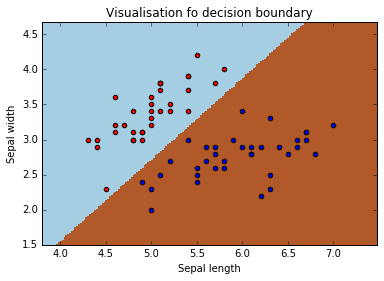

In [3]:
model=linear_model.LogisticRegression(C=1e5)
full_X=np.concatenate((X_class0,X_class1),axis=0)
full_y=np.concatenate((Y_class0,Y_class1),axis=0)
model.fit(full_X,full_y)
h=.02
x_min,x_max=full_X[:,0].min()-.5,full_X[:,0].max()+.5
y_min,y_max=full_X[:,1].min()-.5,full_X[:,1].max()+.5
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
z=model.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Paired)
plt.scatter(X_class0[:,0],X_class0[:,1],c='red',edgecolors='k',cmap=plt.cm.Paired)
plt.scatter(X_class1[:,0],X_class1[:,1],c='blue',edgecolors='k',cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("Visualisation fo decision boundary")
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()